<a href="https://www.kaggle.com/code/arunsworkspace/diabetes-prediction?scriptVersionId=288017103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

First 5 rows of the DataFrame:
   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity  e

In [2]:
print("Missing values before dropping:")
print(df.isnull().sum()[df.isnull().sum() > 0])

df.dropna(inplace=True)

print("\nMissing values after dropping:")
print(df.isnull().sum()[df.isnull().sum() > 0])

print(f"\nShape of DataFrame after dropping missing values: {df.shape}")

Missing values before dropping:
Series([], dtype: int64)

Missing values after dropping:
Series([], dtype: int64)

Shape of DataFrame after dropping missing values: (700000, 26)


In [3]:
X = df.drop(columns=['id', 'diagnosed_diabetes'])
y = df['diagnosed_diabetes']

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}")

Categorical columns: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
Numerical columns: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

print("Shape of preprocessed features (X_preprocessed):")
print(X_preprocessed.shape)

Shape of preprocessed features (X_preprocessed):
(700000, 42)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Shape of X_train: (560000, 42)
Shape of X_test: (140000, 42)
Shape of y_train: (560000,)
Shape of y_test: (140000,)
Logistic Regression model trained successfully.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print(f"\nShape of predicted probabilities (y_pred_proba): {y_pred_proba.shape}")
print(f"First 5 predicted probabilities: {y_pred_proba[:5]}")

Model Evaluation on Test Set:
Accuracy: 0.6617
Precision: 0.6803
Recall: 0.8639
F1-Score: 0.7612
ROC AUC Score: 0.6943

Shape of predicted probabilities (y_pred_proba): (140000,)
First 5 predicted probabilities: [0.50149495 0.641289   0.39764381 0.70008423 0.59645078]


In [7]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
                  id            age  alcohol_consumption_per_week  \
count  700000.000000  700000.000000                 700000.000000   
mean   349999.500000      50.359734                      2.072411   
std    202072.738554      11.655520                      1.048189   
min         0.000000      19.000000                      1.000000   
25%    174999.750000      42.000000                      1.000000   
50%    349999.500000      50.000000                      2.000000   
75%    524999.250000      58.000000                      3.000000   
max    699999.000000      89.000000                      9.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       700000.000000  700000.000000        700000.000000   
mean                            80.230803       5.963695             7.002200   
std                             51.195071       1.463336             0.901907   
min     

In [8]:
print("\nValue counts for categorical columns:")
categorical_cols_df = df.select_dtypes(include='object').columns
for col in categorical_cols_df:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for categorical columns:

Value counts for gender:
gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64

Value counts for ethnicity:
ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64

Value counts for education_level:
education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64

Value counts for income_level:
income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64

Value counts for smoking_status:
smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64

Value counts for employment_status:
employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64


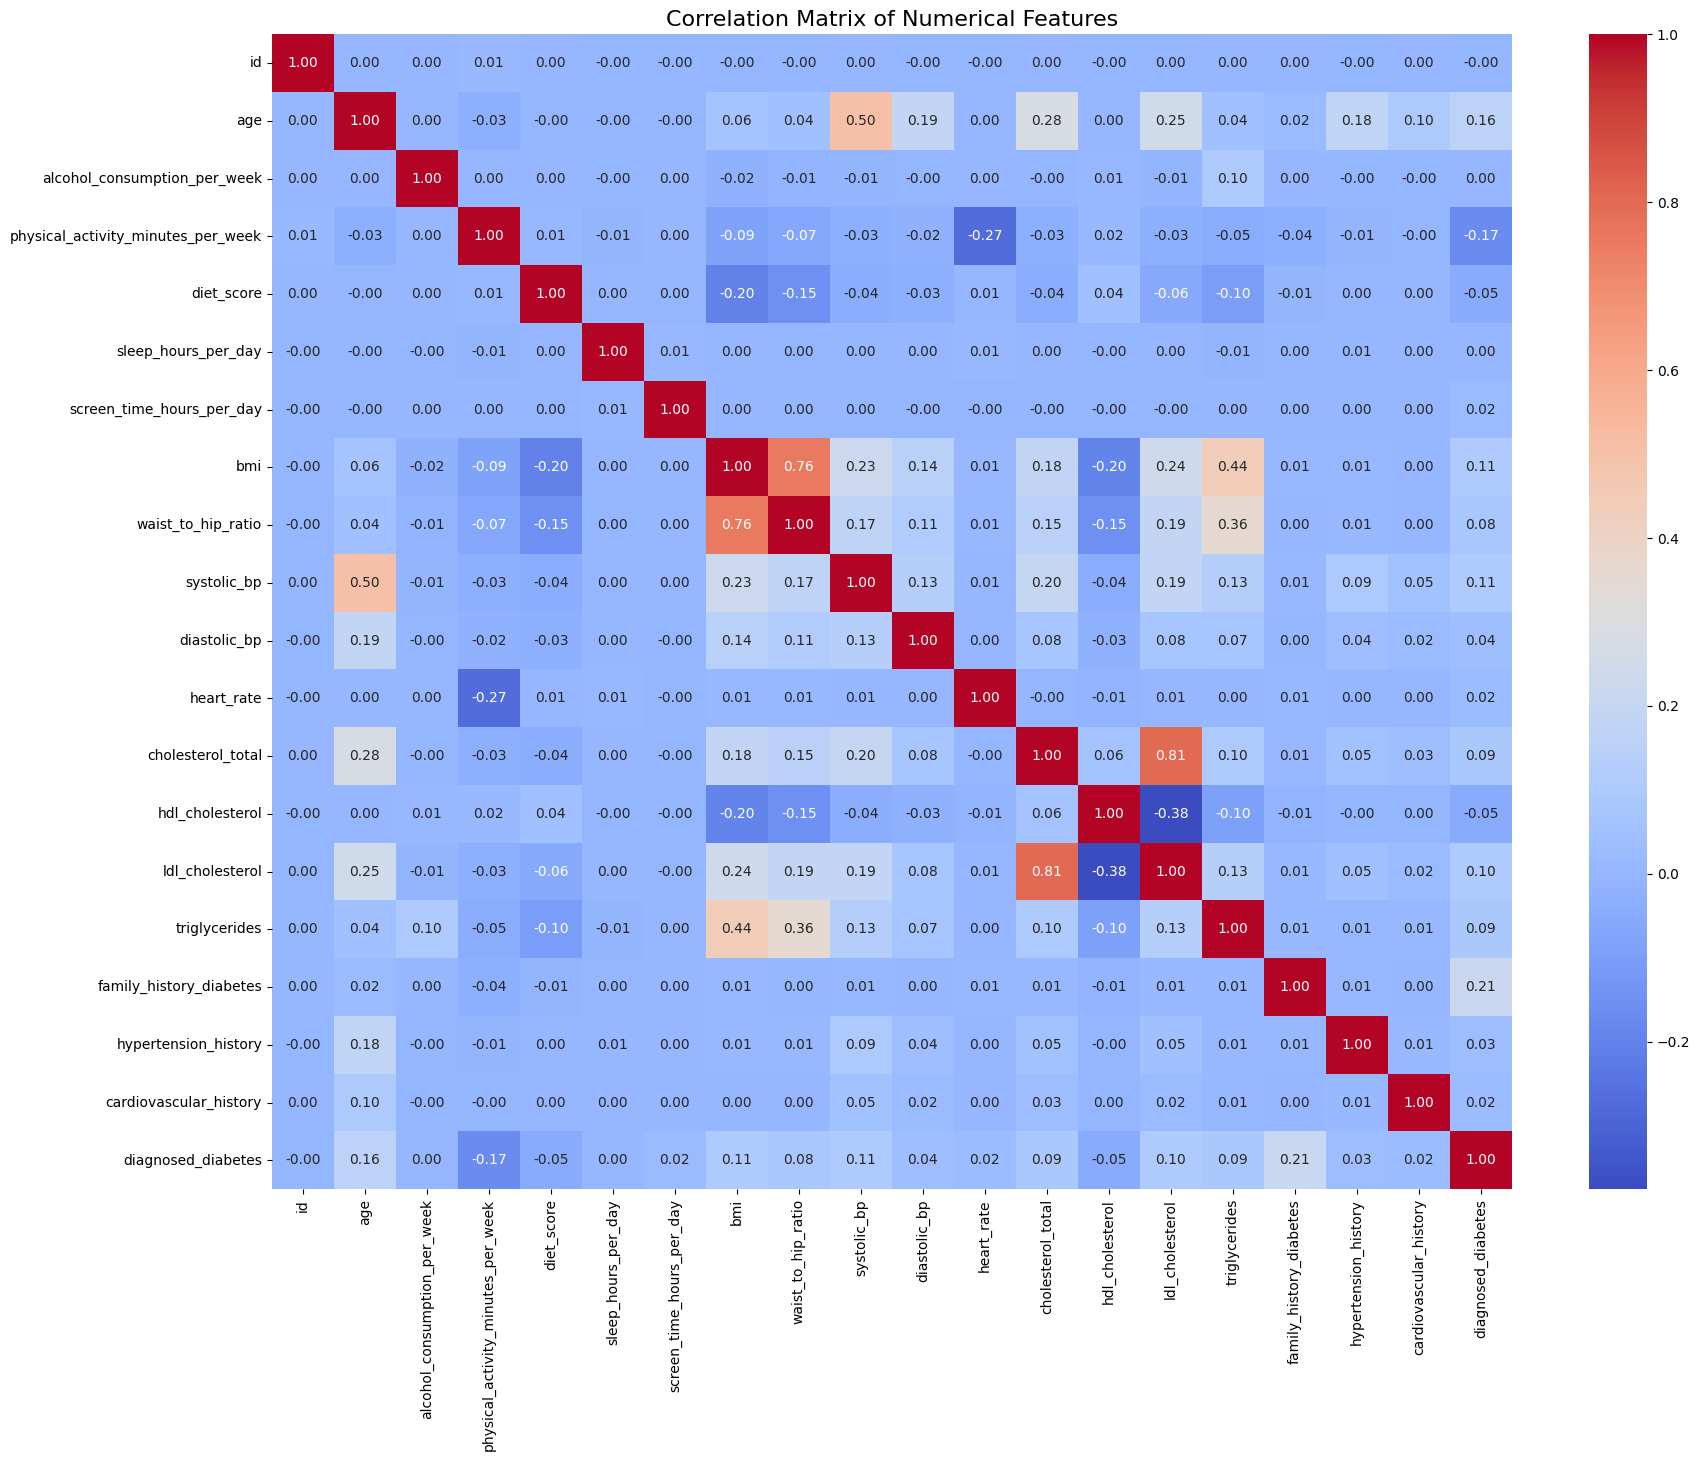

Top 10 correlations with diagnosed_diabetes:
diagnosed_diabetes         1.000000
family_history_diabetes    0.211064
age                        0.161162
systolic_bp                0.107132
bmi                        0.105580
ldl_cholesterol            0.102771
triglycerides              0.090635
cholesterol_total          0.088112
waist_to_hip_ratio         0.081050
diastolic_bp               0.036271
Name: diagnosed_diabetes, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 15))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

print("Top 10 correlations with diagnosed_diabetes:")
print(numerical_df.corr()['diagnosed_diabetes'].sort_values(ascending=False).head(10))

**Reasoning**:
To further understand relationships, especially between categorical features and the target variable, I will perform cross-tabulations. This will help identify if certain categories within a feature have a higher or lower incidence of `diagnosed_diabetes`.



In [10]:
print("\nCross-tabulations for categorical features with diagnosed_diabetes:")
categorical_cols_df = df.select_dtypes(include='object').columns
for col in categorical_cols_df:
    print(f"\nCross-tabulation for {col} vs diagnosed_diabetes:")
    print(pd.crosstab(df[col], df['diagnosed_diabetes'], normalize='index'))


Cross-tabulations for categorical features with diagnosed_diabetes:

Cross-tabulation for gender vs diagnosed_diabetes:
diagnosed_diabetes       0.0       1.0
gender                                
Female              0.377795  0.622205
Male                0.375706  0.624294
Other               0.359434  0.640566

Cross-tabulation for ethnicity vs diagnosed_diabetes:
diagnosed_diabetes       0.0       1.0
ethnicity                             
Asian               0.371507  0.628493
Black               0.376121  0.623879
Hispanic            0.383686  0.616314
Other               0.364064  0.635936
White               0.375895  0.624105

Cross-tabulation for education_level vs diagnosed_diabetes:
diagnosed_diabetes       0.0       1.0
education_level                       
Graduate            0.372992  0.627008
Highschool          0.378538  0.621462
No formal           0.363934  0.636066
Postgraduate        0.383353  0.616647

Cross-tabulation for income_level vs diagnosed_diabetes:
dia

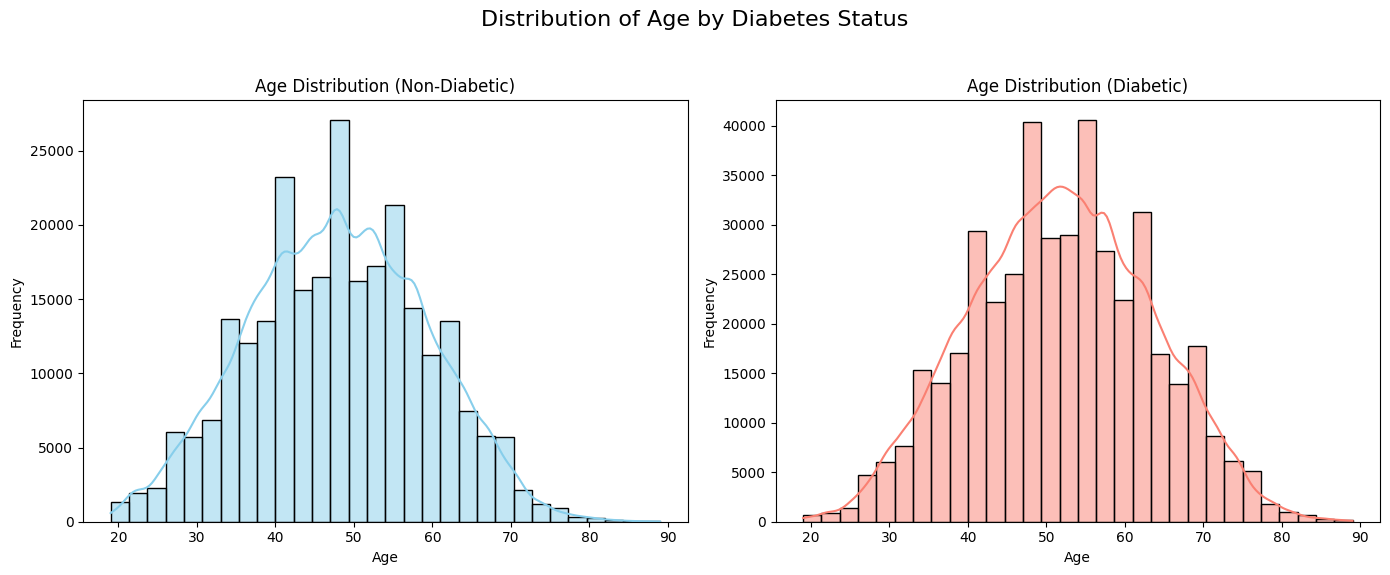

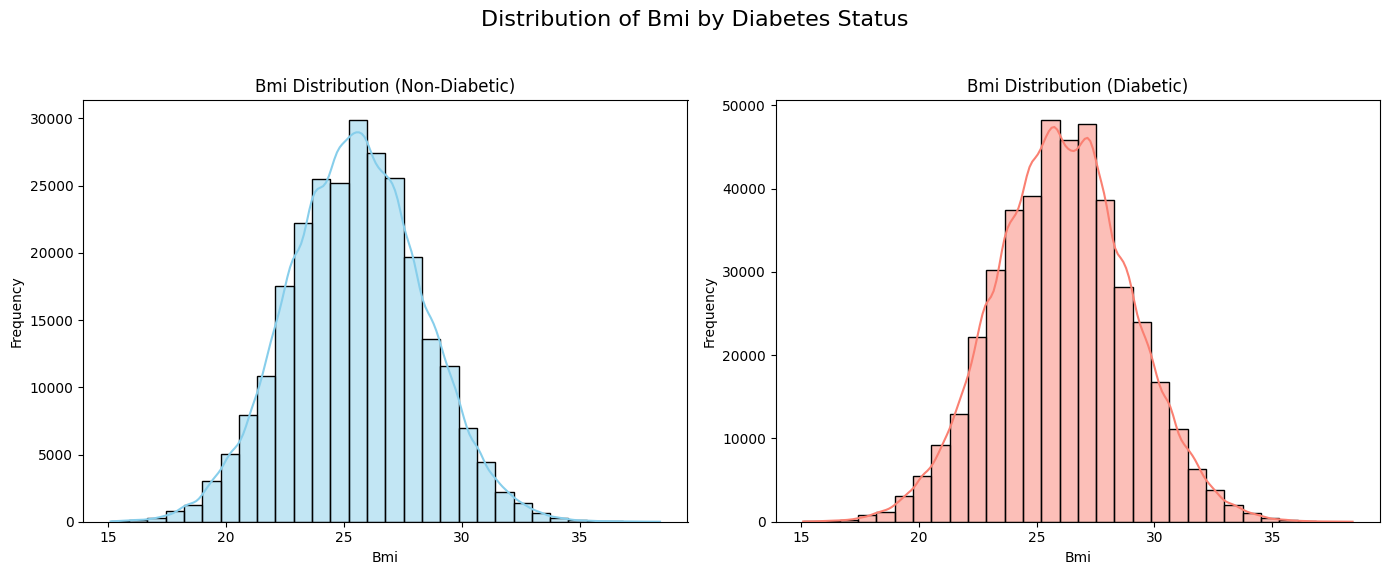

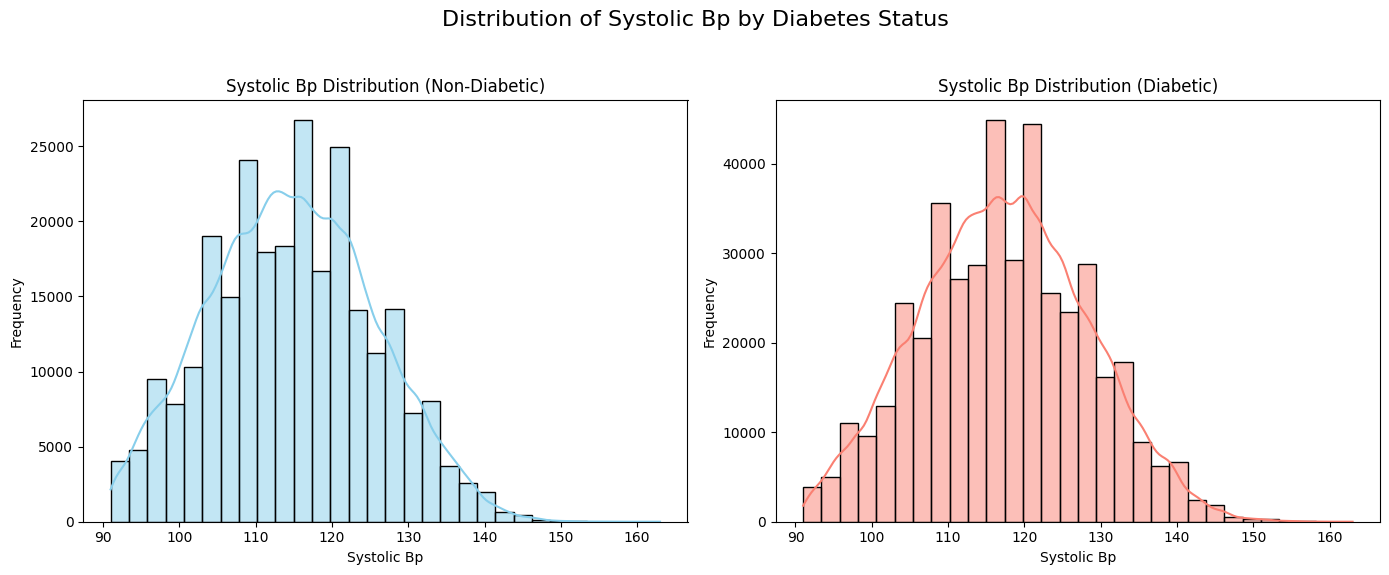

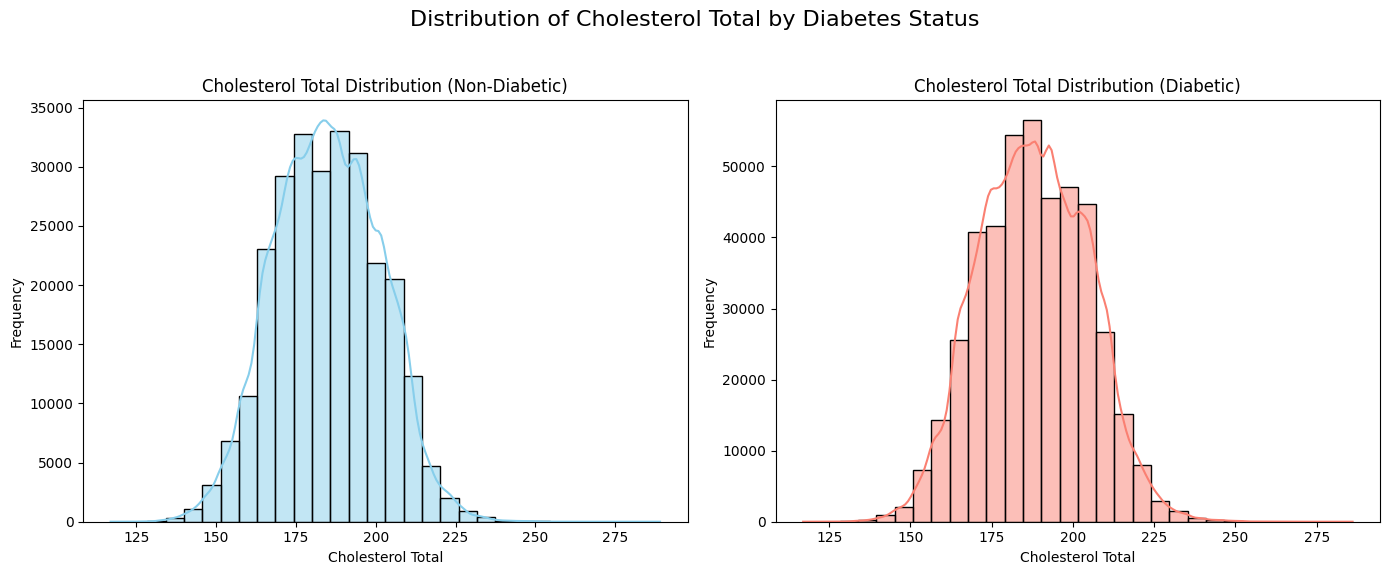

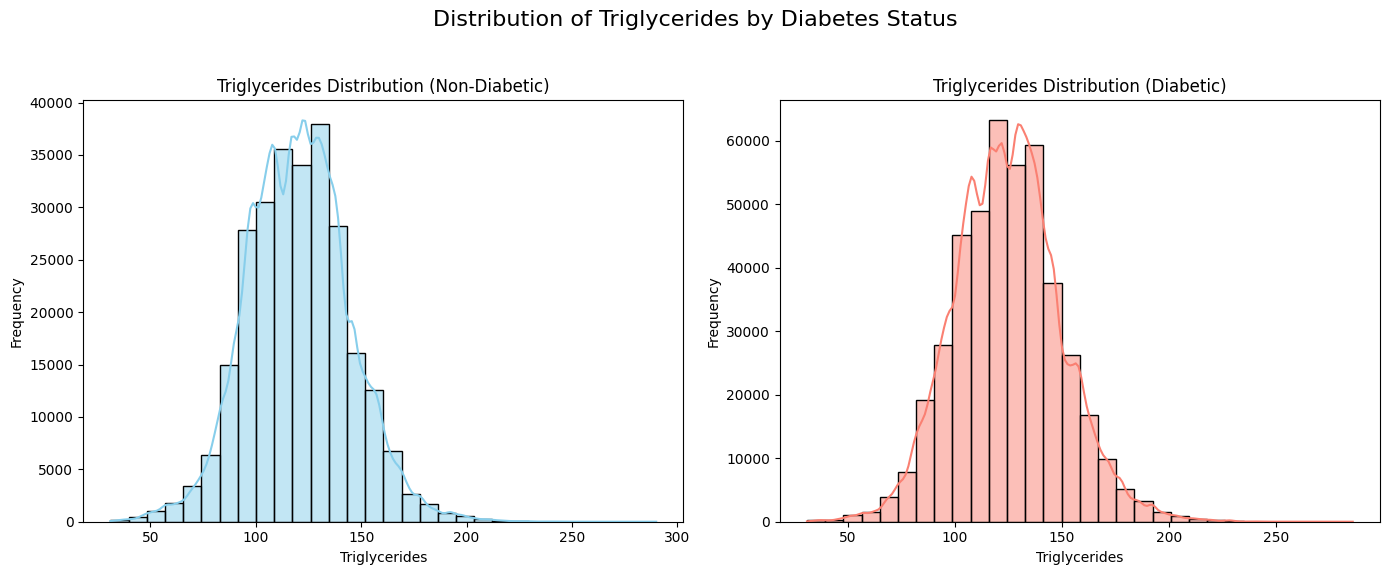

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the key numerical features to visualize
key_numerical_features = ['age', 'bmi', 'systolic_bp', 'cholesterol_total', 'triglycerides']

# Iterate through each feature and create plots
for feature in key_numerical_features:
    plt.figure(figsize=(14, 6))

    # Subplot for non-diabetic individuals (diagnosed_diabetes = 0)
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['diagnosed_diabetes'] == 0][feature], kde=True, color='skyblue', bins=30)
    plt.title(f'{feature.replace("_", " ").title()} Distribution (Non-Diabetic)')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

    # Subplot for diabetic individuals (diagnosed_diabetes = 1)
    plt.subplot(1, 2, 2)
    sns.histplot(df[df['diagnosed_diabetes'] == 1][feature], kde=True, color='salmon', bins=30)
    plt.title(f'{feature.replace("_", " ").title()} Distribution (Diabetic)')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

    plt.suptitle(f'Distribution of {feature.replace("_", " ").title()} by Diabetes Status', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


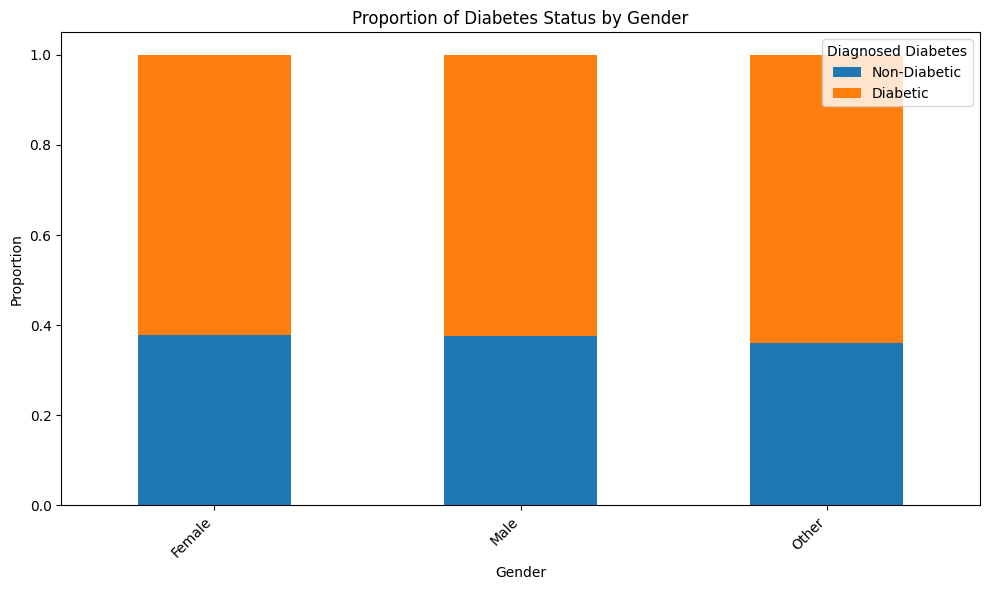

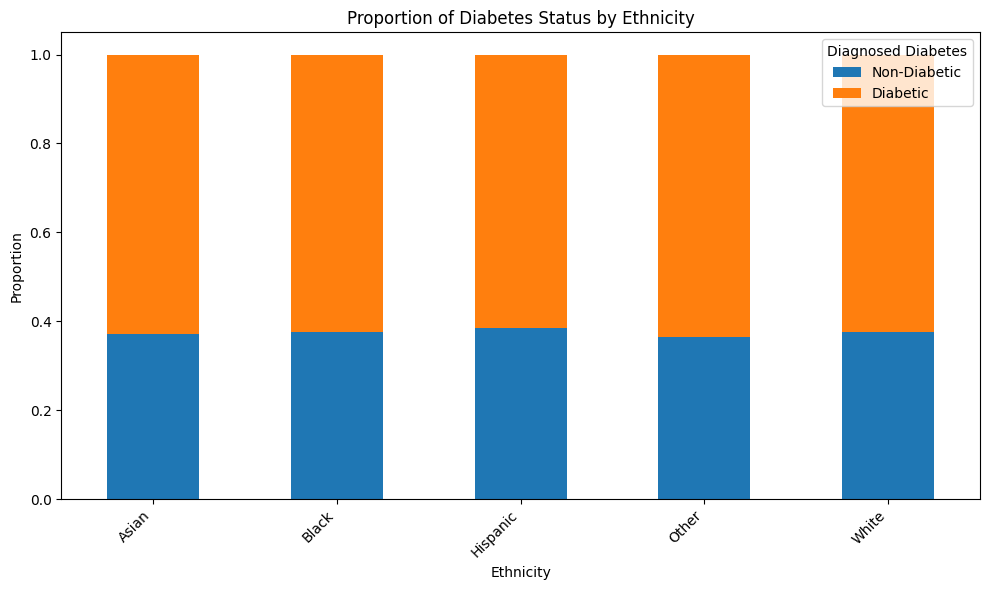

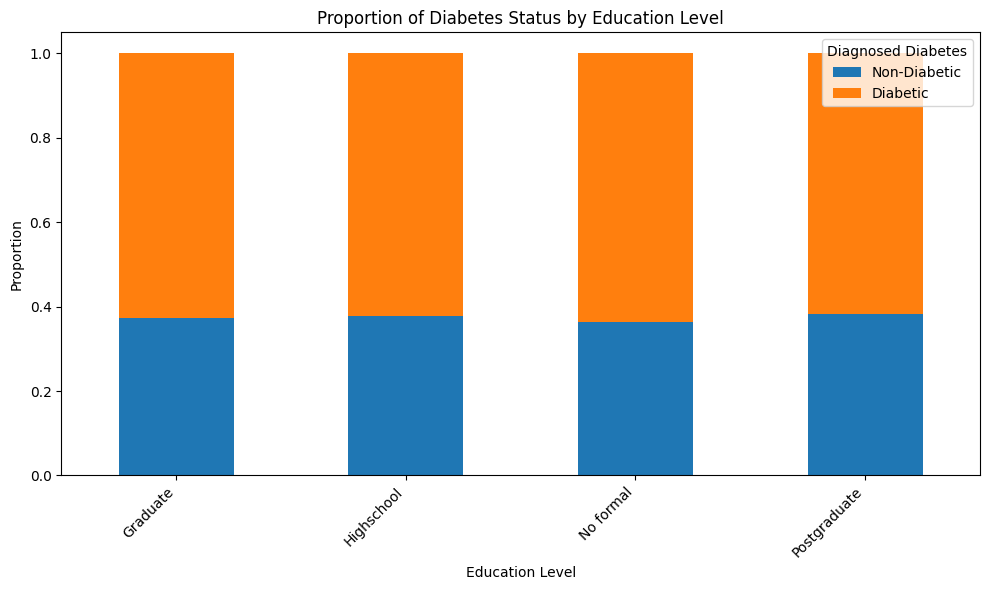

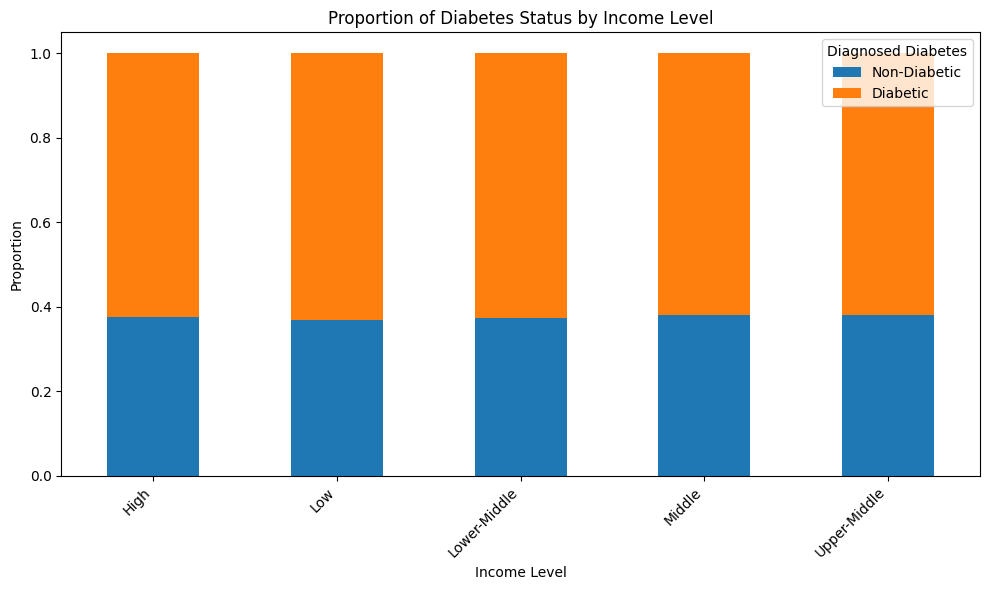

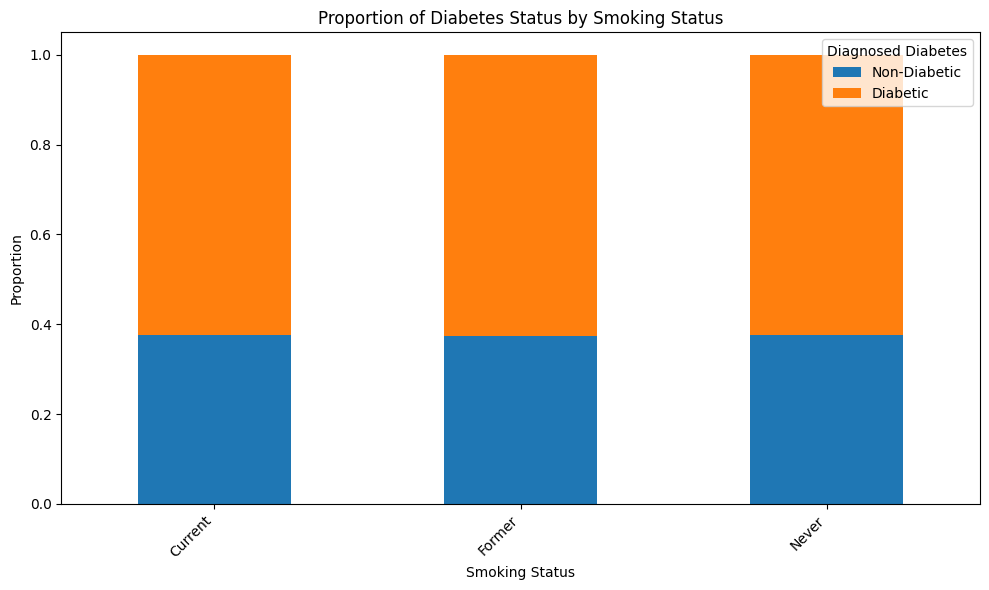

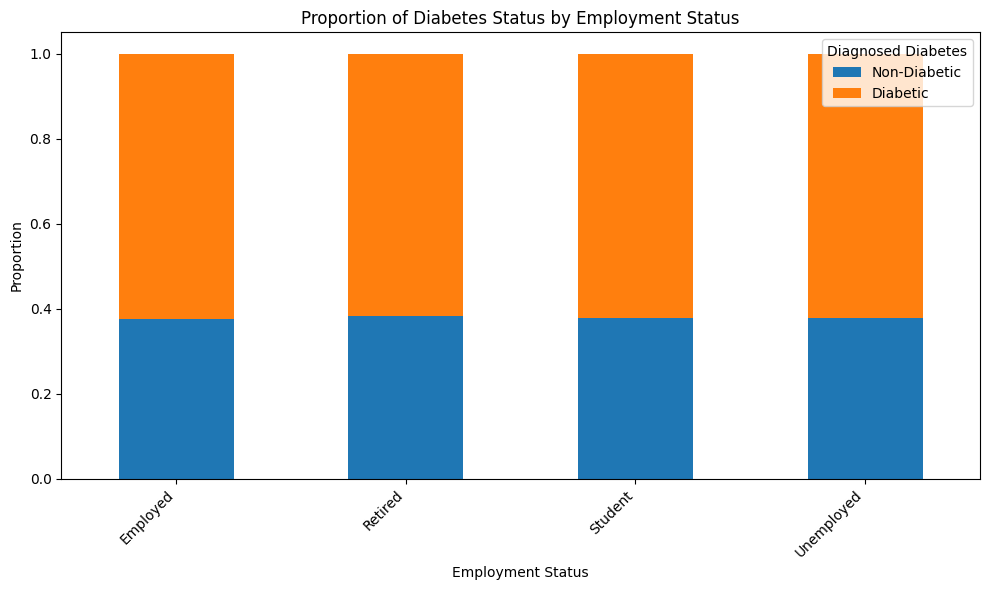

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorical_cols_to_plot = ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']

for col in categorical_cols_to_plot:
    # Create a cross-tabulation with diagnosed_diabetes, normalizing by the index
    crosstab_df = pd.crosstab(df[col], df['diagnosed_diabetes'], normalize='index')

    # Plotting the stacked bar chart
    crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Proportion of Diabetes Status by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Diagnosed Diabetes', labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.show()

<Figure size 800x600 with 0 Axes>

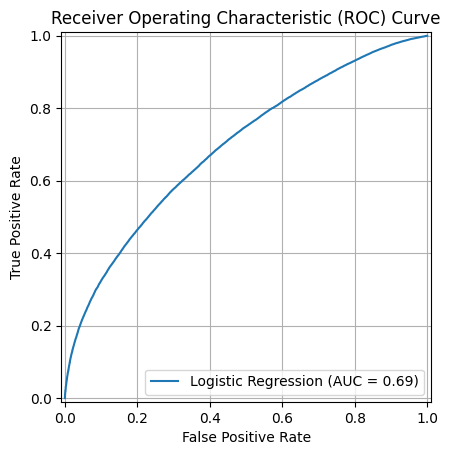

ROC AUC Score: 0.6943


<Figure size 800x600 with 0 Axes>

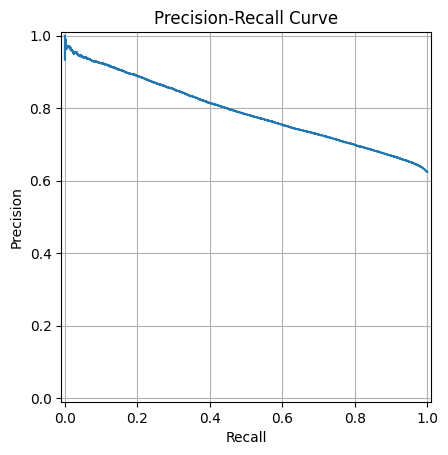

<Figure size 800x600 with 0 Axes>

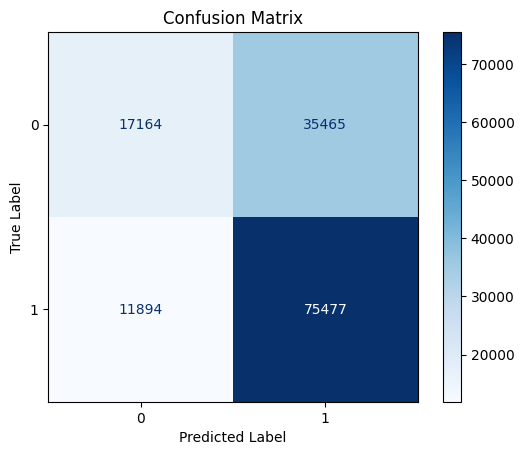

In [13]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2. Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
# Use RocCurveDisplay for plotting
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

# 3. Calculate and plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
# Use PrecisionRecallDisplay for plotting
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# 4. Generate and display a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
# Use ConfusionMatrixDisplay for plotting
cmd_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv')
df.dropna(inplace=True)

X = df.drop(columns=['id', 'diagnosed_diabetes'])
y = df['diagnosed_diabetes']

categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

test_ids = df.loc[y_test.index, 'id']

submission_df = pd.DataFrame({
    'id': test_ids,
    'diagnosed_diabetes': y_pred_proba
})

print("First 5 rows of the submission file:")
display(submission_df.head())

submission_df.to_csv('submission.csv', index=False)

print("\n'submission.csv' created successfully!")

First 5 rows of the submission file:


,id,diagnosed_diabetes
637949,637949,0.501495
656465,656465,0.641289
337739,337739,0.397644
230222,230222,0.700084
82039,82039,0.596451



'submission.csv' created successfully!
